In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, LSTM

import tensorflow as tf

import seaborn as sns

from sklearn.metrics import r2_score

In [5]:
pwd

'/Users/felixnie/Desktop/CS/CS_4650/Untitled Folder'

In [6]:
ls

AAPL.csv                    LSTM_GOOGL.ipynb
GOOGL-2013_2023.csv         LinearRegressionAAPL.ipynb
GOOGL.csv                   UpdatedLSTM_GOOGL.ipynb
LSTM_AAPL.ipynb             Zhihu.ipynb


In [7]:
df = pd.read_csv('/Users/felixnie/Desktop/CS/CS_4650/Untitled Folder/GOOGL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-12,36.599998,36.768501,36.213501,36.403500,36.403500,27094000
1,2016-05-13,36.331001,36.564499,36.175499,36.241501,36.241501,25244000
2,2016-05-16,36.216000,36.633999,36.000000,36.514999,36.514999,22538000
3,2016-05-17,36.553001,36.792500,35.900002,36.009499,36.009499,33404000
4,2016-05-18,35.924999,36.278500,35.750999,36.089001,36.089001,32536000
...,...,...,...,...,...,...,...
1757,2023-05-05,104.820000,105.879997,104.110001,105.570000,105.570000,26625100
1758,2023-05-08,105.180000,107.959999,105.160004,107.769997,107.769997,26511400
1759,2023-05-09,108.389999,110.150002,107.190002,107.349998,107.349998,36360100
1760,2023-05-10,107.970001,112.940002,107.930000,111.750000,111.750000,63153400


In [8]:
df = df.dropna()
df = df.drop_duplicates()
df.columns.values

array(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
      dtype=object)

In [9]:
df.reset_index(drop=True,inplace=True)

In [10]:
train = df[:int(0.9 * len(df))] 
train
test = df.iloc[1500:,:]

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

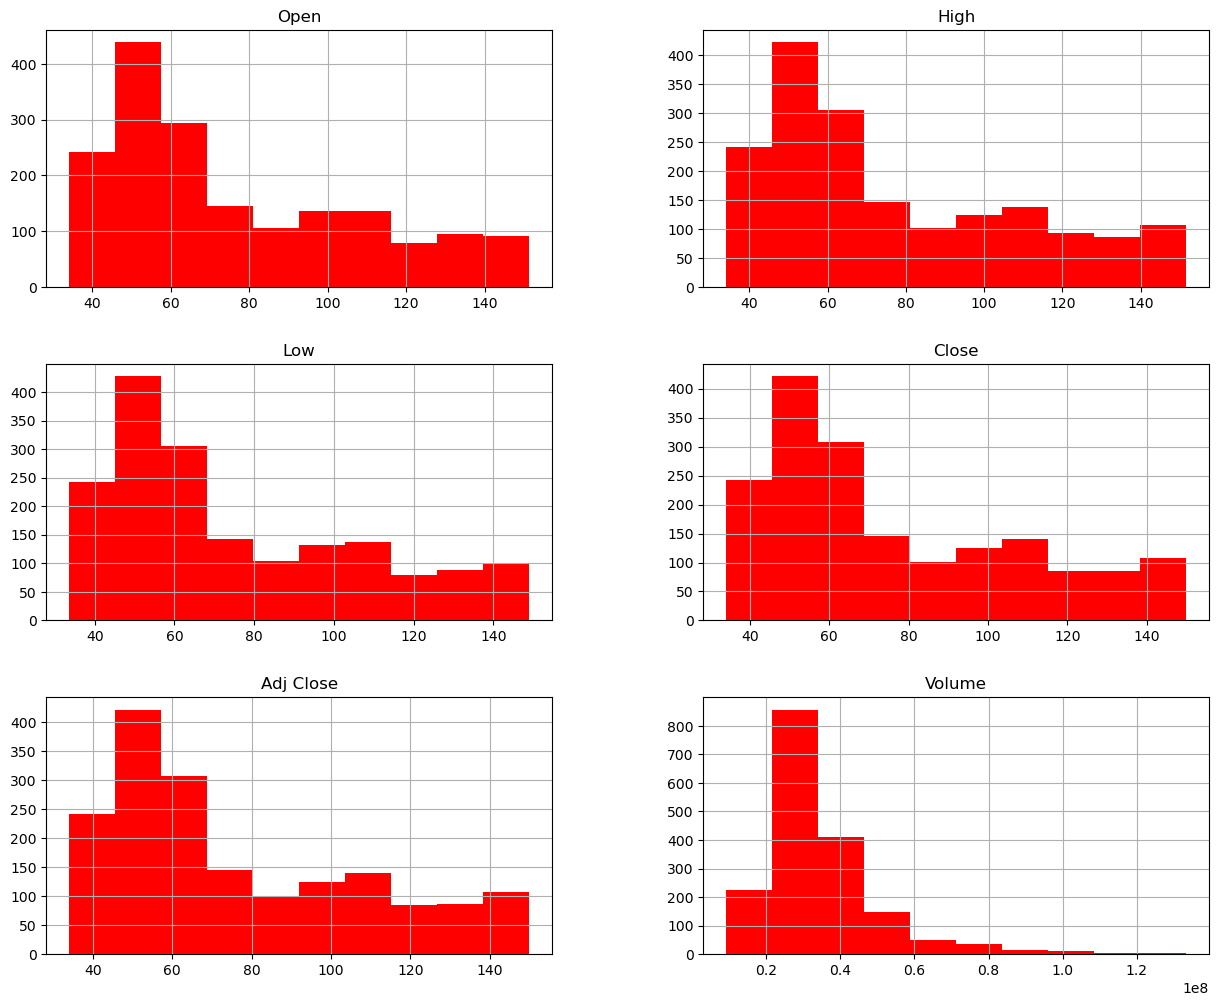

In [19]:
df.hist(figsize=(15,12),color='#ff0000')

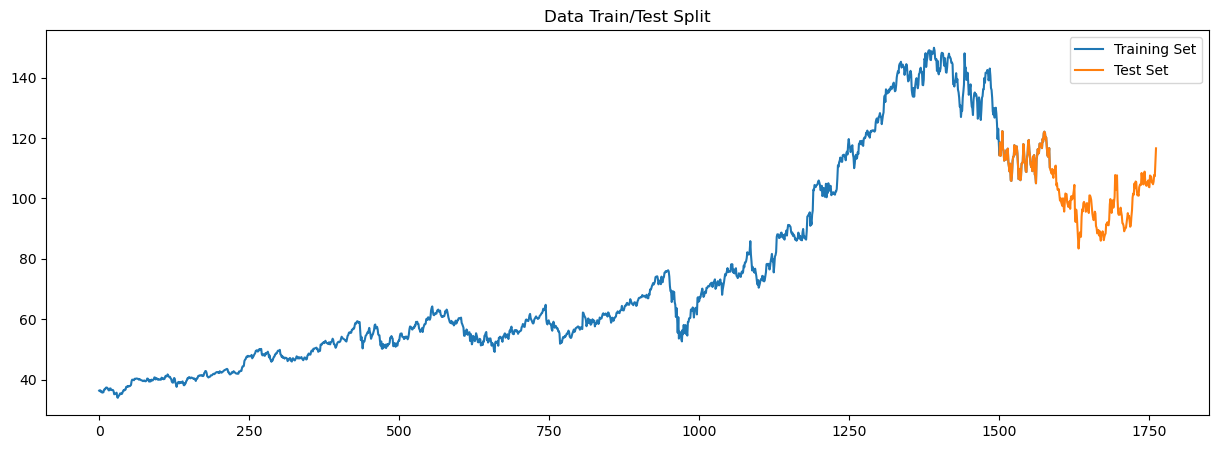

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
train.Close.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.Close.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Test Set'])
plt.show();

In [13]:
close_train= train.iloc[:, 4:5].values 
close_train

array([[ 36.4035  ],
       [ 36.241501],
       [ 36.514999],
       ...,
       [113.690002],
       [116.650002],
       [110.339996]])

In [14]:
normalizer = MinMaxScaler(feature_range=(-1,1))

train_set_scaled= normalizer.fit_transform(close_train)

In [15]:
train_set_scaled

array([[-0.95946674],
       [-0.96226509],
       [-0.95754071],
       ...,
       [ 0.37557385],
       [ 0.42670464],
       [ 0.31770612]])

In [16]:
x_train= []
y_train = []
 
for i in range(60, len(train)): 
    x_train.append(train_set_scaled[i-60:i, 0])  
    y_train.append(train_set_scaled[i, 0])   

x_train, y_train= np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 

In [17]:
regressor = Sequential() 

regressor.add(LSTM(units = 256, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.1))  


regressor.add(LSTM(units = 128, return_sequences = True))
regressor.add(Dropout(0.1))  

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))


regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.1))



              
regressor.add(Dense(units = 1, activation = 'selu'))
regressor.compile(optimizer = 'nadam', loss = 'mean_squared_error',metrics = ['mean_absolute_error'])


regressor.fit(x_train, y_train, epochs = 100, batch_size = 32) 

Epoch 1/100
48/48 [==============================] - 8s 121ms/step - loss: 0.0274 - mean_absolute_error: 0.1156
Epoch 2/100
48/48 [==============================] - 6s 122ms/step - loss: 0.0093 - mean_absolute_error: 0.0761
Epoch 3/100
48/48 [==============================] - 6s 128ms/step - loss: 0.0099 - mean_absolute_error: 0.0765
Epoch 4/100
48/48 [==============================] - 6s 129ms/step - loss: 0.0069 - mean_absolute_error: 0.0652
Epoch 5/100
48/48 [==============================] - 6s 130ms/step - loss: 0.0070 - mean_absolute_error: 0.0653
Epoch 6/100
48/48 [==============================] - 6s 135ms/step - loss: 0.0065 - mean_absolute_error: 0.0632
Epoch 7/100
48/48 [==============================] - 6s 132ms/step - loss: 0.0065 - mean_absolute_error: 0.0633
Epoch 8/100
48/48 [==============================] - 6s 132ms/step - loss: 0.0060 - mean_absolute_error: 0.0605
Epoch 9/100
48/48 [==============================] - 6s 133ms/step - loss: 0.0049 - mean_absolute_error:

48/48 [==============================] - 7s 136ms/step - loss: 0.0019 - mean_absolute_error: 0.0330
Epoch 74/100
48/48 [==============================] - 7s 136ms/step - loss: 0.0020 - mean_absolute_error: 0.0333
Epoch 75/100
48/48 [==============================] - 7s 139ms/step - loss: 0.0020 - mean_absolute_error: 0.0335
Epoch 76/100
48/48 [==============================] - 7s 142ms/step - loss: 0.0018 - mean_absolute_error: 0.0316
Epoch 77/100
48/48 [==============================] - 7s 146ms/step - loss: 0.0022 - mean_absolute_error: 0.0340
Epoch 78/100
48/48 [==============================] - 7s 142ms/step - loss: 0.0016 - mean_absolute_error: 0.0300
Epoch 79/100
48/48 [==============================] - 7s 144ms/step - loss: 0.0019 - mean_absolute_error: 0.0320
Epoch 80/100
48/48 [==============================] - 7s 145ms/step - loss: 0.0021 - mean_absolute_error: 0.0336
Epoch 81/100
48/48 [==============================] - 7s 146ms/step - loss: 0.0021 - mean_absolute_error: 0.0

In [20]:
price_test = test.iloc[:, 4:5].values

In [21]:
close_train.shape

(1585, 1)

In [22]:
totality = pd.concat((pd.DataFrame(close_train), test['Close']), axis = 0)
totality.reset_index(drop=True,inplace=True)

In [23]:
len(totality)

1847

In [24]:
inputs = totality[len(totality) - len(test) - 60:].values
inputs = inputs.reshape(-1, 1)

In [25]:
inputs = normalizer.transform(inputs)
len(inputs)

322

In [26]:
x_test = []
y_test=[]
for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i, 0]) 


    y_test.append(inputs[i, 0])   

x_test, y_test= np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
print('X_train Shape: ', x_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', x_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (1525, 60, 1)
y_train Shape:  (1525,)
X_test Shape:   (262, 60, 1)
y_test Shape:   (262,)


In [28]:
predicted_price= regressor.predict(x_test)
predicted_price = normalizer.inverse_transform(predicted_price)

9/9 [==============================] - 1s 42ms/step


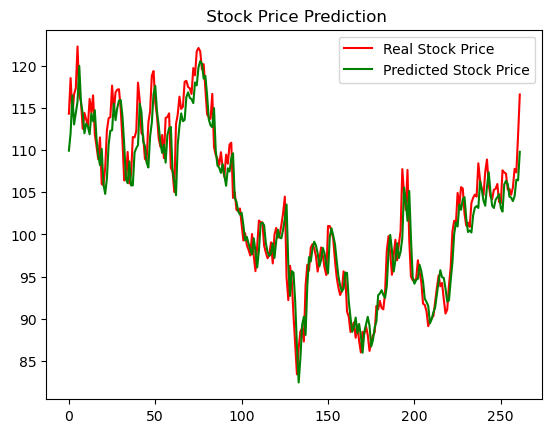

In [29]:
plt.plot(price_test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title(' Stock Price Prediction')
plt.legend()
plt.show()

In [67]:
r2_score(price_test[0:len(test)],predicted_price)

0.9202453283511914

In [68]:
result =regressor.evaluate(x_test, y_test)

9/9 [==============================] - 1s 38ms/step - loss: 0.0021 - mean_absolute_error: 0.0365


In [69]:
result

[0.0021086218766868114, 0.03647126629948616]